>>># **Harris Corner Detector**




**Motivation:**


*   corners are way more better than edges as image features 
*   we detect interest points ,that if we have a window and we place it on top of every one of these points, we look into this window and we will find a corner waiting for us :)

---


**Harris equations:**


> ![alt text](https://www.muthu.co/wp-content/uploads/2018/09/Snip20180930_26.png)
> ![alt text](https://muthu.co/wp-content/uploads/2018/09/Snip20180930_27.png)



*   **Ix** : is the image derivative in the x direction
*   **Iy** : is the image derivative in the y direction
*   **w**: is the window we take of the image , calculations are done inside it, we try to detect if the window center pixel corresponds to an interest point (there is an edge around it)

>![alt text](https://muthu.co/wp-content/uploads/2018/09/Snip20180930_28.png)

*  **R** : is the Ratio we use to detect for every window that if it contains an edge or not.

---

**Algorithm:**




1.  Convert a given image to a gray image
1.   Gaussian Blur to reduce the noise (not necessary)
2.   Take derivative of the image in the x direcion  Ix
3.   Take derivative of the image in the y direcion  Iy
4.   Compute the M matrix
5.   Compute the H matrix by taking the trace and the det of the M matrix




1.0
[247 148  29 255]


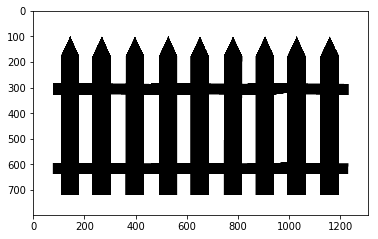

In [0]:
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray
from scipy import ndimage

#reading the image
simg= imread('./Fence-1.png')



#Step1: image to gray image
gray_img = rgb2gray(simg)
plt.imshow(gray_img,cmap='gray')

print(img[0][0])
print(simg[300][100])

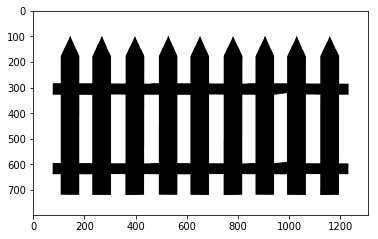

In [0]:
#using gaussian blur to denoise the image
#implementing gaussian blur
import numpy as np

def gaussian_kernel(std=1,kernel_size=7):
  x=kernel_size//2
  d_kernel_linespace = range(-x,x+1)
  
  hkernel=[np.exp(-i**2/2*std**2) for i in d_kernel_linespace] #1d kernel
  kernel_sum = np.sum(hkernel)
  #hkernel    = hkernel/kernel_sum
  
  #vkernel=np.vstack(hkernel)
  g = [[x*y for x in hkernel] for y in hkernel]
  return np.array(g)


kernel = gaussian_kernel()
blurred_img = ndimage.filters.convolve(gray_img, kernel)

plt.imshow(blurred_img,cmap='gray')




In [0]:
blurred_img[0][0]

6.279784795934702

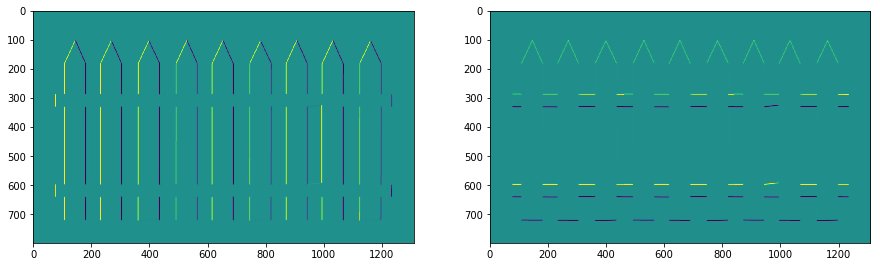

In [0]:
#step 3 : take image derivative in the x direction and the y direction

#will use sobel kernels for the derivation
#x direction
sobelx=[[-1,0,1],
        [-2,0,2],
        [-1,0,1]]
#y direction
sobely=[[-1,-2,-1],
        [0,0,0],
        [1,2,1]]

ix=ndimage.filters.convolve(blurred_img, sobelx)
iy=ndimage.filters.convolve(blurred_img, sobely)


plt.figure(figsize=(15,30))
plt.subplot(1,2,1)
plt.imshow(ix)
plt.subplot(1,2,2)
plt.imshow(iy)


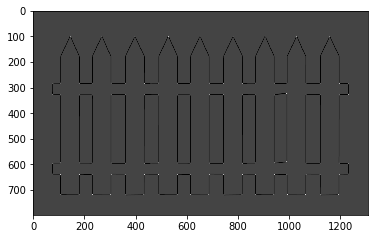

In [0]:
#Generate Tensors
ixx=ndimage.filters.convolve(ix**2, kernel)
iyy=ndimage.filters.convolve(iy**2, kernel)
ixy=ndimage.filters.convolve(ix*iy, kernel)



det_m = ixx*iyy-(ixy**2)
trace_m = (ixx+iyy)**2
H = det_m -(0.04*trace_m)
plt.imshow(H,cmap='gray')